# 1. Import libraries

In [1]:
#import libraries
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('babylon.csv', encoding='latin-1')
data.head()

,Response,Score
0,"I am not proud of this but unfortunately, I a...",4.0
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0
2,"""1.-trust: I once read that believing in an ec...",4.0
3,"Resourceful, Enabling, Transcendent",1.5
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0


# 2. Data Cleaning 

In [3]:
# Define a function to clean the text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# Apply the cleaning function to the text column
data['cleaned_response'] = data['Response'].apply(clean_text)

# Print the cleaned data
print(data['cleaned_response'])

0      proud unfortunately somewhat ostrich always st...
1      focused skeptical balanced focused want able r...
2      trust read believing economic system mental di...
3                      resourceful enabling transcendent
4      work weaknesses windfalls money comes strength...
                             ...                        
632    feel aches stupid choices youth sister nurse r...
633    lisa eldridge besides top make artist earth ap...
634    breakfast yoghurt fruit either banana apple pe...
635                                            olive oil
636                                     water coffee tea
Name: cleaned_response, Length: 637, dtype: object


In [4]:
#Lower Casing
data['cleaned_response'] = data['cleaned_response'].str.lower()
data

,Response,Score,cleaned_response
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...
...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...
635,Olive Oil,1.0,olive oil


In [5]:
nltk.download('omw')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to apply stemming
def apply_stemming(text):
    tokens = word_tokenize(text)  # Tokenize the text
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Apply stemming to each token
    return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a string

# Function to apply lemmatization
def apply_lemmatization(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  
    # Apply lemmatization to each token
    return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a string

# Apply stemming to the 'text_responses' column
data['stemmed_text'] = data['cleaned_response'].apply(apply_stemming)

# Apply lemmatization to the 'text_responses' column
data['lemmatized_text'] = data['cleaned_response'].apply(apply_lemmatization)

# Print the updated DataFrame
data.head()


[nltk_data] Downloading package omw to /home/faculty/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Response,Score,cleaned_response,stemmed_text,lemmatized_text
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...


In [6]:
nltk.download('punkt')
data['tokens'] = data['cleaned_response'].apply(word_tokenize)
data

[nltk_data] Downloading package punkt to /home/faculty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa..."
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ..."
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men..."
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]"
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st..."
...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ..."
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e..."
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap..."
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]"


# 3. Lexical Diversity models

## 3.1 CTTR (Correlated Type-Token Ratio) 

In [7]:
data['CTTR'] = data['tokens'].apply(lambda x: len(set(x)) / len(x) 
                                    if len(x) > 0 else 0)
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444
...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000


In [8]:
# Assuming 'train' is the DataFrame containing the predicted scores in the 'predicted_score' column
CTTR_range = data['CTTR'].min(), data['CTTR'].max()
print("Score range: ", CTTR_range)

Score range:  (0.5714285714285714, 1.0)


In [9]:
# Define the minimum and maximum values for the transformation
min_value_CTTR = data['CTTR'].min()
max_value_CTTR = data['CTTR'].max()

# Perform the linear transformation in the range 1 to 4.
data['CTTR_scaled'] = ((data['CTTR'] - min_value_CTTR) / (max_value_CTTR - min_value_CTTR)) * 3 + 1
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111
...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000


## 3.2 Shannon's Entropy 

In [10]:
# Calculate Shannon's Entropy for each row
def calculate_entropy(tokens):
    fd = FreqDist(tokens)
    probabilities = [fd.freq(token) for token in set(tokens)]
    return -sum(p * math.log2(p) for p in probabilities)

In [11]:
data['Entropy'] = data['tokens'].apply(calculate_entropy)
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814
...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000


In [12]:
# Assuming 'train' is the DataFrame containing the predicted scores in the 'predicted_score' column
Entropy_range = data['Entropy'].min(), data['Entropy'].max()
print("Score range: ", Entropy_range)

Score range:  (-0.0, 8.083206598236133)


In [13]:
# Assuming you have calculated the Shannon's entropy values and stored them in a column called 'entropy'
min_entropy = data['Entropy'].min()
max_entropy = data['Entropy'].max()

# Scale the entropy values to the range of 1 to 4
scaled_entropy = stats.zscore(data['Entropy'])
scaled_entropy = (scaled_entropy - scaled_entropy.min()) / (scaled_entropy.max() - 
                                                            scaled_entropy.min())
scaled_entropy = scaled_entropy * 3 + 1

# Store the scaled entropy values in a new column called 'scaled_entropy'
data['scaled_Entropy'] = scaled_entropy
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388
...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140


# 4. Semantic Diversity

## Word Embedding Models -- Word2Vec 

### 4.1 Word2Vec with linear regression analysis 

In [14]:
# Step 1: Prepare the data
X = data['tokens'].astype(str)  # Text data
y = data['Score']  # Creativity scores



In [15]:
# Step 2: Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Convert the sparse matrix to an array
X_array = X_vectorized.toarray()

In [16]:
# Step 4: Scale the input data
scaler = MinMaxScaler(feature_range=(1, 4))
X_scaled = scaler.fit_transform(X_array)

# Step 5: Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False]}


In [17]:
# Step 6: Initialize and perform hyperparameter tuning with leave-one-out validation
regression_model = LinearRegression()
grid_search = GridSearchCV(regression_model, param_grid, scoring='neg_mean_squared_error',  cv=KFold(n_splits=10))
grid_search.fit(X_scaled, y)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [18]:
# Step 6: Get the best hyperparameters and model
best_params_lr = grid_search.best_params_
best_model_lr = grid_search.best_estimator_
print(best_params_lr,best_model_lr)

{'fit_intercept': False} LinearRegression(fit_intercept=False)


In [19]:
# Step 8: Perform leave-one-out validation using the best model
loo = LeaveOneOut()
predictions = np.zeros(len(X_scaled))
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_model_lr.fit(X_train, y_train)
    predictions[test_index] = best_model_lr.predict(X_test)
    

In [20]:
# Step 9: Transform the predicted scores to the range of 1 to 4
scaled_scores = (predictions - np.min(predictions)) / (np.max(predictions) - np.min(predictions)) * 3 + 1


In [21]:
# Step 10: Insert new columns for vector representation and predicted scores
data['vector_representation'] = list(X_scaled)
data['predicted_score_lr'] = scaled_scores

# Step 11: Print the updated DataFrame with the vector representation and predicted scores
data


,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728
...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728


In [22]:
# Assuming 'train' is the DataFrame containing the predicted scores 
#in the 'predicted_score' column
score_range_lr = data['predicted_score_lr'].min(), data['predicted_score_lr'].max()
print("Score range_lr: ", score_range_lr)


Score range_lr:  (1.0, 4.0)


### 4.2 Word2Vec with Random Forest Analysis

In [24]:
# Step 1: Prepare the data
X = data['tokens'].astype(str)  # Tokenized text data
y = data['Score']  # Creativity scores

# Step 2: Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Convert the sparse matrix to an array
X_array = X_vectorized.toarray()

In [25]:
# Step 4: Scale the input data
scaler = MinMaxScaler(feature_range=(1, 4))
X_scaled = scaler.fit_transform(X_array)


In [26]:
# Step 5: Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}


In [27]:
# Step 6: Initialize and perform hyperparameter tuning with 10-fold cross-validation
random_forest = RandomForestRegressor(random_state=42)
grid_search1 = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=KFold(n_splits=10))
grid_search1.fit(X_scaled, y)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [28]:
# Step 7: Get the best hyperparameters and model
best_params_rf = grid_search1.best_params_
best_model_rf = grid_search1.best_estimator_
print(best_params_rf,best_model_rf)

{'max_depth': 10, 'n_estimators': 50} RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)


In [29]:
# Step 8: Perform leave-one-out validation using the best model
loo = LeaveOneOut()
predictions_rf = np.zeros(len(X_scaled))
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_model_rf.fit(X_train, y_train)
    predictions_rf[test_index] = best_model_rf.predict(X_test)


In [30]:
# Step 9: Transform the predicted scores to the range of 1 to 4
min_score_rf = np.min(predictions_rf)
max_score_rf = np.max(predictions_rf)
scaled_scores_rf = ((predictions_rf - min_score_rf) / 
                    (max_score_rf - min_score_rf)) * 3 + 1


In [31]:
# Step 10: Insert new column for scaled scores
data['predicted_score_rf'] = scaled_scores_rf
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046


In [32]:
absolute_difference = np.abs(data['Score'] - data['predicted_score_rf'])
percentage_error = (absolute_difference / data['Score'] ) * 100


In [33]:
mean_absolute_percentage_error = np.mean(percentage_error)
mean_absolute_percentage_error

25.82905894314295

### 4.3 Feature Importance 

In [34]:
# Get feature importance scores
feature_importance_rf = best_model_rf.feature_importances_

# Get the original feature names
feature_names = vectorizer.get_feature_names()

# Create a dictionary to store feature names and their importance scores
feature_scores = {feature: importance for feature, importance in zip(feature_names, 
                                                                     feature_importance_rf)}

# Sort the features based on their importance scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 features
top_features = sorted_features[:20]

# Print the top 20 features and their importance scores
for feature, importance in top_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: like, Importance: 0.20206387462341927
Feature: also, Importance: 0.05956375637881174
Feature: life, Importance: 0.01829802475438945
Feature: gets, Importance: 0.015375704054898312
Feature: work, Importance: 0.0153347876114746
Feature: different, Importance: 0.013835712192952541
Feature: good, Importance: 0.013210775475000951
Feature: really, Importance: 0.012875765902158625
Feature: become, Importance: 0.012734801133105074
Feature: never, Importance: 0.012470426991518927
Feature: body, Importance: 0.01222755902687653
Feature: much, Importance: 0.012142550735607731
Feature: parents, Importance: 0.010969610603492486
Feature: food, Importance: 0.010413949371129693
Feature: idea, Importance: 0.009982239754304718
Feature: well, Importance: 0.009629223060075095
Feature: people, Importance: 0.009599380904785418
Feature: new, Importance: 0.008709094833439276
Feature: get, Importance: 0.0084956346547262
Feature: make, Importance: 0.007812853262799442


/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
# Create a new DataFrame
df_top_features = pd.DataFrame(top_features, columns=['Feature', 'Importance'])
df_top_features

,Feature,Importance
0,like,0.202064
1,also,0.059564
2,life,0.018298
3,gets,0.015376
4,work,0.015335
5,different,0.013836
6,good,0.013211
7,really,0.012876
8,become,0.012735
9,never,0.012470


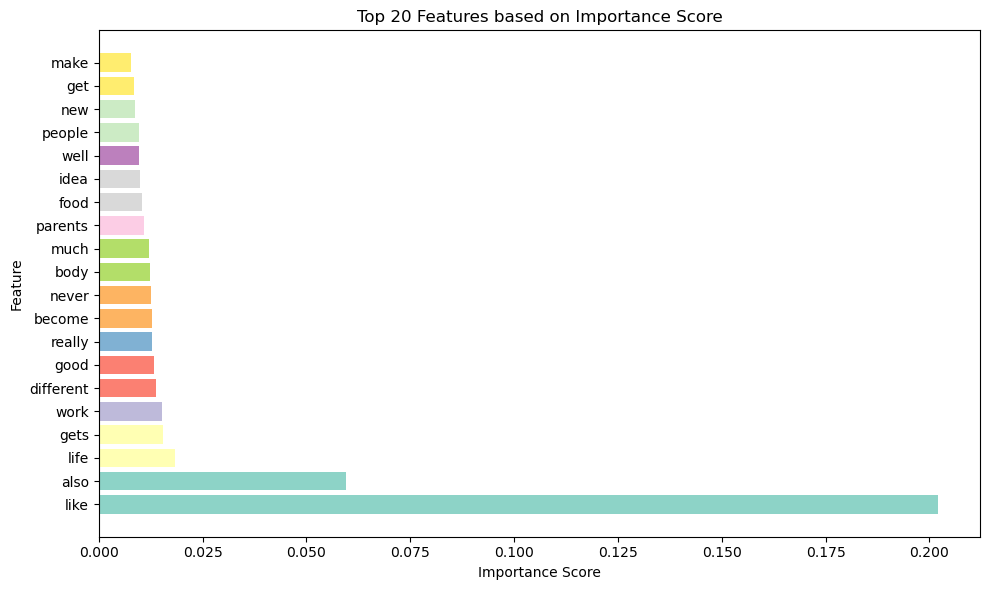

In [36]:
# Generate colors for the bars
num_bars = len(df_top_features)
colors = plt.cm.Set3(np.linspace(0, 1, num_bars))

# Visualize the top features
plt.figure(figsize=(10, 6))
plt.barh(df_top_features['Feature'], df_top_features['Importance'], color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Features based on Importance Score')
plt.tight_layout()
plt.show()

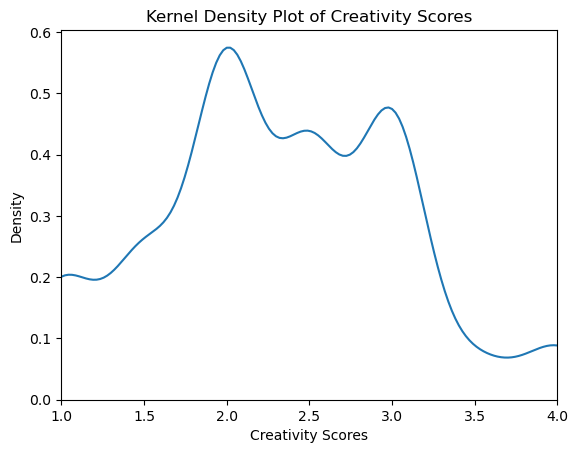

In [53]:
# Assuming you have a pandas DataFrame called 'data' with a column named 'creativity_scores'
creativity_scores = data['Score']

# Plot the Kernel Density Plot
sns.kdeplot(creativity_scores)
# Set the x-axis limits
plt.xlim(1, 4)

# Add labels and title
plt.xlabel('Creativity Scores')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Creativity Scores')

# Display the plot
plt.show()


### 4.4 The weight of two models 

#### 4.4.1 Combination 1: CTTR and word2vec with linear regression 

In [37]:
data['CTTR_LR'] = 0.5 * data['CTTR_scaled'] + 0.5 * data['predicted_score_lr']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366,2.016111
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226,2.008159
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254,1.619122
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695,2.636364
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085,2.441919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927,2.367133
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088,2.136364
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152,2.163391
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046,2.636364


In [38]:
absolute_difference_CLR = np.abs(data['Score'] - data['CTTR_LR'])
percentage_error_CLR = (absolute_difference_CLR / data['Score'] ) * 100

mean_absolute_percentage_error_CLR = np.mean(percentage_error_CLR)
mean_absolute_percentage_error_CLR

39.34994130280965

#### 4.4.2 Combination 2: CTTR and word2vec with random forest

In [39]:
data['CTTR_RF'] = 0.5 * data['CTTR_scaled'] + 0.5 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,CTTR_RF
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366,2.016111,3.000930
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226,2.008159,2.673908
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254,1.619122,2.759886
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695,2.636364,2.511847
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085,2.441919,2.330598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927,2.367133,2.245733
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088,2.136364,2.462044
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152,2.163391,2.257603
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046,2.636364,2.515023


In [40]:
absolute_difference_CRF = np.abs(data['Score'] - data['CTTR_RF'])
percentage_error_CRF = (absolute_difference_CRF / data['Score'] ) * 100

mean_absolute_percentage_error_CRF = np.mean(percentage_error_CRF)
mean_absolute_percentage_error_CRF

37.88363927866498

#### 4.4.3 Combination 3: Shannon's Entropy and word2vec with linear regression

In [41]:
data['Entropy_LR'] = 0.5 * data['scaled_Entropy'] + 0.5 * data['predicted_score_lr']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,CTTR_RF,Entropy_LR
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366,2.016111,3.000930,2.416130
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226,2.008159,2.673908,2.050561
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254,1.619122,2.759886,2.418122
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695,2.636364,2.511847,1.430485
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085,2.441919,2.330598,1.889558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927,2.367133,2.245733,1.794505
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088,2.136364,2.462044,2.035184
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152,2.163391,2.257603,2.052928
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046,2.636364,2.515023,1.321934


In [42]:
absolute_difference_ELR = np.abs(data['Score'] - data['Entropy_LR'])
percentage_error_ELR = (absolute_difference_ELR / data['Score'] ) * 100

mean_absolute_percentage_error_ELR = np.mean(percentage_error_ELR)
mean_absolute_percentage_error_ELR

23.63096690424872

In [43]:
data['CTTR_RF'] = 0.5 * data['CTTR_scaled'] + 0.5 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,CTTR_RF,Entropy_LR
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366,2.016111,3.000930,2.416130
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226,2.008159,2.673908,2.050561
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254,1.619122,2.759886,2.418122
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695,2.636364,2.511847,1.430485
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085,2.441919,2.330598,1.889558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927,2.367133,2.245733,1.794505
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088,2.136364,2.462044,2.035184
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152,2.163391,2.257603,2.052928
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046,2.636364,2.515023,1.321934


In [44]:
absolute_difference_CRF = np.abs(data['Score'] - data['CTTR_RF'])
percentage_error_CRF = (absolute_difference_CRF / data['Score'] ) * 100

mean_absolute_percentage_error_CRF = np.mean(percentage_error_CRF)
mean_absolute_percentage_error_CRF

37.88363927866498

#### 4.4.4 Combination 4: Shannon's Entropy and Word2Vec with random forest

In [45]:
data['Entropy_RF'] = 0.5 * data['scaled_Entropy'] + 0.5 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,CTTR_RF,Entropy_LR,Entropy_RF
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366,2.016111,3.000930,2.416130,3.400950
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226,2.008159,2.673908,2.050561,2.716310
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254,1.619122,2.759886,2.418122,3.558885
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695,2.636364,2.511847,1.430485,1.305969
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085,2.441919,2.330598,1.889558,1.778236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927,2.367133,2.245733,1.794505,1.673105
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088,2.136364,2.462044,2.035184,2.360865
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152,2.163391,2.257603,2.052928,2.147140
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046,2.636364,2.515023,1.321934,1.200593


In [46]:
absolute_difference_ERF = np.abs(data['Score'] - data['Entropy_RF'])
percentage_error_ERF = (absolute_difference_ERF / data['Score'] ) * 100


In [47]:
mean_absolute_percentage_error_ERF = np.mean(percentage_error_ERF)
mean_absolute_percentage_error_ERF


23.429032942659298

In [48]:
data['Entropy_RF_1'] = 0.4 * data['scaled_Entropy'] + 0.6 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,CTTR_RF,Entropy_LR,Entropy_RF,Entropy_RF_1
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",1.272728,3.242366,2.016111,3.000930,2.416130,3.400950,3.369233
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",1.272728,2.604226,2.008159,2.673908,2.050561,2.716310,2.693893
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,3.554254,1.619122,2.759886,2.418122,3.558885,3.557958
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.023695,2.636364,2.511847,1.430485,1.305969,1.249514
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.050085,2.441919,2.330598,1.889558,1.778236,1.632606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.029927,2.367133,2.245733,1.794505,1.673105,1.544469
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.924088,2.136364,2.462044,2.035184,2.360865,2.273509
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.461152,2.163391,2.257603,2.052928,2.147140,2.009943
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.272728,1.030046,2.636364,2.515023,1.321934,1.200593,1.166484


In [49]:
absolute_difference_ERF1 = np.abs(data['Score'] - data['Entropy_RF_1'])
percentage_error_ERF1 = (absolute_difference_ERF1 / data['Score'] ) * 100


In [50]:
mean_absolute_percentage_error_ERF1 = np.mean(percentage_error_ERF1)
mean_absolute_percentage_error_ERF1

22.794787308933667

### 4.4.4.1 Distribution of creativity scores with the optimised weight of combinations

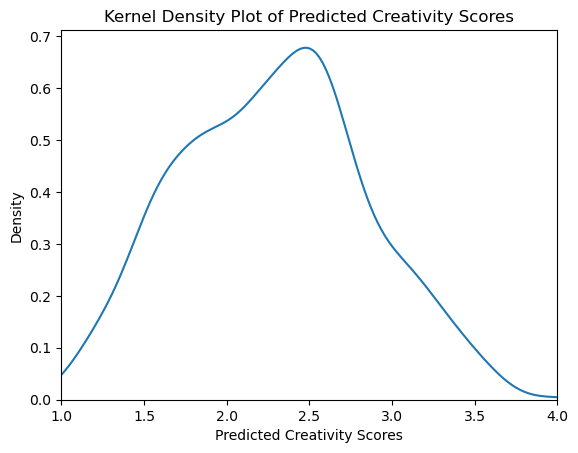

In [54]:
# Assuming you have a pandas DataFrame called 'data' with a column named 'creativity_scores'
predicted_scores = data['Entropy_RF_1']

# Plot the Kernel Density Plot
sns.kdeplot(predicted_scores)
# Set the x-axis limits
plt.xlim(1, 4)

# Add labels and title
plt.xlabel('Predicted Creativity Scores')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Predicted Creativity Scores')

# Display the plot
plt.show()


In [44]:
data['Entropy_RF_2'] = 0.3 * data['scaled_Entropy'] + 0.7 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,Entropy_LR,Entropy_RF,Entropy_RF_1,Entropy_RF_2
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",3.968267,3.242366,3.363880,3.763900,3.400950,3.369233,3.337516
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",3.968267,2.604226,3.355928,3.398330,2.716310,2.693893,2.671476
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,3.554254,2.966892,3.765891,3.558885,3.557958,3.557032
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.023695,3.984133,2.778255,1.305969,1.249514,1.193059
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.050085,3.789689,3.237327,1.778236,1.632606,1.486976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.029927,3.714903,3.142274,1.673105,1.544469,1.415834
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.924088,3.484133,3.382954,2.360865,2.273509,2.186154
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.461152,3.511160,3.400697,2.147140,2.009943,1.872745
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.030046,3.984133,2.669703,1.200593,1.166484,1.132374


In [45]:
absolute_difference_ERF2 = np.abs(data['Score'] - data['Entropy_RF_2'])
percentage_error_ERF2 = (absolute_difference_ERF2 / data['Score'] ) * 100


In [46]:
mean_absolute_percentage_error_ERF2 = np.mean(percentage_error_ERF2)
mean_absolute_percentage_error_ERF2

22.817283267096855

In [47]:
data['Entropy_RF_3'] = 0.2 * data['scaled_Entropy'] + 0.8 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,Entropy_LR,Entropy_RF,Entropy_RF_1,Entropy_RF_2,Entropy_RF_3
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",3.968267,3.242366,3.363880,3.763900,3.400950,3.369233,3.337516,3.305800
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",3.968267,2.604226,3.355928,3.398330,2.716310,2.693893,2.671476,2.649060
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,3.554254,2.966892,3.765891,3.558885,3.557958,3.557032,3.556106
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.023695,3.984133,2.778255,1.305969,1.249514,1.193059,1.136604
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.050085,3.789689,3.237327,1.778236,1.632606,1.486976,1.341345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.029927,3.714903,3.142274,1.673105,1.544469,1.415834,1.287198
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.924088,3.484133,3.382954,2.360865,2.273509,2.186154,2.098799
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.461152,3.511160,3.400697,2.147140,2.009943,1.872745,1.735547
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.030046,3.984133,2.669703,1.200593,1.166484,1.132374,1.098265


In [48]:
absolute_difference_ERF3 = np.abs(data['Score'] - data['Entropy_RF_3'])
percentage_error_ERF3 = (absolute_difference_ERF3 / data['Score'] ) * 100

mean_absolute_percentage_error_ERF3 = np.mean(percentage_error_ERF3)
mean_absolute_percentage_error_ERF3

23.4281572940397

In [49]:
data['Entropy_RF_4'] = 0.6 * data['scaled_Entropy'] + 0.4 * data['predicted_score_rf']
data

,Response,Score,cleaned_response,stemmed_text,lemmatized_text,tokens,CTTR,CTTR_scaled,Entropy,scaled_Entropy,vector_representation,predicted_score_lr,predicted_score_rf,CTTR_LR,Entropy_LR,Entropy_RF,Entropy_RF_1,Entropy_RF_2,Entropy_RF_3,Entropy_RF_4
0,"I am not proud of this but unfortunately, I a...",4.0,proud unfortunately somewhat ostrich always st...,proud unfortun somewhat ostrich alway stick he...,proud unfortunately somewhat ostrich always st...,"[proud, unfortunately, somewhat, ostrich, alwa...",0.822785,2.759494,6.896410,3.559533,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",3.968267,3.242366,3.363880,3.763900,3.400950,3.369233,3.337516,3.305800,3.432666
1,"""Focused, Skeptical, Balanced.\n \n Focused be...",2.0,focused skeptical balanced focused want able r...,focus skeptic balanc focus want abl realli res...,focused skeptical balanced focused want able r...,"[focused, skeptical, balanced, focused, want, ...",0.820513,2.743590,4.926428,2.828394,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 1.0, 1.0, 1.0, ...",3.968267,2.604226,3.355928,3.398330,2.716310,2.693893,2.671476,2.649060,2.738727
2,"""1.-trust: I once read that believing in an ec...",4.0,trust read believing economic system mental di...,trust read believ econom system mental diseas ...,trust read believing economic system mental di...,"[trust, read, believing, economic, system, men...",0.709360,1.965517,6.907142,3.563516,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,3.554254,2.966892,3.765891,3.558885,3.557958,3.557032,3.556106,3.559811
3,"Resourceful, Enabling, Transcendent",1.5,resourceful enabling transcendent,resourc enabl transcend,resourceful enabling transcendent,"[resourceful, enabling, transcendent]",1.000000,4.000000,1.584963,1.588243,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.023695,3.984133,2.778255,1.305969,1.249514,1.193059,1.136604,1.362424
4,"""Work, Weaknesses and Windfalls.\n \n Money co...",2.0,work weaknesses windfalls money comes strength...,work weak windfal money come strength leav wea...,work weakness windfall money come strength lea...,"[work, weaknesses, windfalls, money, comes, st...",0.944444,3.611111,4.058814,2.506388,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.050085,3.789689,3.237327,1.778236,1.632606,1.486976,1.341345,1.923867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,I'm 52 and now feel the aches of stupid choice...,1.5,feel aches stupid choices youth sister nurse r...,feel ach stupid choic youth sister nurs recomm...,feel ache stupid choice youth sister nurse rec...,"[feel, aches, stupid, choices, youth, sister, ...",0.923077,3.461538,3.546594,2.316282,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.029927,3.714903,3.142274,1.673105,1.544469,1.415834,1.287198,1.801740
633,Lisa Eldridge. Besides being a top make-up art...,2.0,lisa eldridge besides top make artist earth ap...,lisa eldridg besid top make artist earth appro...,lisa eldridge besides top make artist earth ap...,"[lisa, eldridge, besides, top, make, artist, e...",0.857143,3.000000,4.843569,2.797641,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.924088,3.484133,3.382954,2.360865,2.273509,2.186154,2.098799,2.448220
634,"For breakfast, having yoghurt with a fruit (ei...",1.0,breakfast yoghurt fruit either banana apple pe...,breakfast yoghurt fruit either banana appl pea...,breakfast yoghurt fruit either banana apple pe...,"[breakfast, yoghurt, fruit, either, banana, ap...",0.864865,3.054054,4.939183,2.833128,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.461152,3.511160,3.400697,2.147140,2.009943,1.872745,1.735547,2.284338
635,Olive Oil,1.0,olive oil,oliv oil,olive oil,"[olive, oil]",1.000000,4.000000,1.000000,1.371140,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.968267,1.030046,3.984133,2.669703,1.200593,1.166484,1.132374,1.098265,1.234702


In [50]:
absolute_difference_ERF4 = np.abs(data['Score'] - data['Entropy_RF_4'])
percentage_error_ERF4 = (absolute_difference_ERF4 / data['Score'] ) * 100

mean_absolute_percentage_error_ERF4 = np.mean(percentage_error_ERF4)
mean_absolute_percentage_error_ERF4

24.56867796079496

In [61]:
data['Entropy_RF_5'] = 0.7 * data['scaled_Entropy'] + 0.3 * data['predicted_score_rf']

In [62]:
absolute_difference_ERF5 = np.abs(data['Score'] - data['Entropy_RF_5'])
percentage_error_ERF5 = (absolute_difference_ERF5 / data['Score'] ) * 100

mean_absolute_percentage_error_ERF5 = np.mean(percentage_error_ERF5)
mean_absolute_percentage_error_ERF5

26.17519544316921

In [65]:
data['Entropy_RF_6'] = 0.8 * data['scaled_Entropy'] + 0.2 * data['predicted_score_rf']

In [66]:
absolute_difference_ERF6 = np.abs(data['Score'] - data['Entropy_RF_6'])
percentage_error_ERF6 = (absolute_difference_ERF6 / data['Score'] ) * 100

mean_absolute_percentage_error_ERF6 = np.mean(percentage_error_ERF6)
mean_absolute_percentage_error_ERF6

28.32245984074651

In [67]:
data['Entropy_RF_7'] = 0.9 * data['scaled_Entropy'] + 0.1 * data['predicted_score_rf']

In [68]:
absolute_difference_ERF7 = np.abs(data['Score'] - data['Entropy_RF_7'])
percentage_error_ERF7 = (absolute_difference_ERF7 / data['Score'] ) * 100

mean_absolute_percentage_error_ERF7 = np.mean(percentage_error_ERF7)
mean_absolute_percentage_error_ERF7

30.928777299921105

In [69]:
data['Entropy_RF_8'] = 0.1 * data['scaled_Entropy'] + 0.9 * data['predicted_score_rf']

In [70]:
absolute_difference_ERF8 = np.abs(data['Score'] - data['Entropy_RF_8'])
percentage_error_ERF8 = (absolute_difference_ERF8 / data['Score'] ) * 100

mean_absolute_percentage_error_ERF8 = np.mean(percentage_error_ERF8)
mean_absolute_percentage_error_ERF8

24.49547269318354

## 5. Test the model 

To test the model, the newdataset test.csv is used, and there is no column recording manual rated scores.

In [52]:
test = pd.read_csv('test.csv', encoding='utf-8')
test.head()

,Response
0,1. Muffins made easy\r\n2. Made easy for Maxim...
1,I put A family breakfast as 3rd choice. I noti...
2,"1. Bake Now, Enjoy Later is my third choice. ..."
3,1. I like that it mentions plant-based and alm...
4,1. Plant forward goodness \r\n2. The concept o...


In [53]:
# Define a function to clean the text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# Apply the cleaning function to the text column
test['cleaned_Response'] = test['Response'].apply(clean_text)

# Print the cleaned data
print(test['cleaned_Response'])

0     muffins made easy made easy maximum enjoyment ...
1     put family breakfast rd choice noticed favorit...
2     bake enjoy later third choice phrase claim bac...
3     like mentions plant based almond suggests grai...
4     plant forward goodness concept decadence quali...
5     convenience one put place important convenienc...
6     chose craving convenience long day want someth...
7     negative space minimal modern design less clut...
8     someone feels like running even treat light we...
9     key concepts would mentioning quality natural ...
10    think pushing almond part product key need dis...
11    overall design look feel feels friendly modern...
12    plant based high quality almond flour would ge...
13    image delicious looking dessert new way baking...
14    quality trust wholesome goodness sourced direc...
15    bake together love nd favorite concept liked f...
16    chose fuss free favorites liked concept simple...
17    verbiage even concise impactful feels like

In [54]:
#Lower Casing
test['cleaned_Response'] = test['cleaned_Response'].str.lower()
test

,Response,cleaned_Response
0,1. Muffins made easy\r\n2. Made easy for Maxim...,muffins made easy made easy maximum enjoyment ...
1,I put A family breakfast as 3rd choice. I noti...,put family breakfast rd choice noticed favorit...
2,"1. Bake Now, Enjoy Later is my third choice. ...",bake enjoy later third choice phrase claim bac...
3,1. I like that it mentions plant-based and alm...,like mentions plant based almond suggests grai...
4,1. Plant forward goodness \r\n2. The concept o...,plant forward goodness concept decadence quali...
5,Convenience is the one that I put in 3 place b...,convenience one put place important convenienc...
6,I chose craving convenience because it's after...,chose craving convenience long day want someth...
7,1. More negative space/minimal modern in desig...,negative space minimal modern design less clut...
8,Someone that feels like running even after hav...,someone feels like running even treat light we...
9,They key concepts would be mentioning the qual...,key concepts would mentioning quality natural ...


In [55]:
test['Tokens'] = test['cleaned_Response'].apply(word_tokenize)
test

,Response,cleaned_Response,Tokens
0,1. Muffins made easy\r\n2. Made easy for Maxim...,muffins made easy made easy maximum enjoyment ...,"[muffins, made, easy, made, easy, maximum, enj..."
1,I put A family breakfast as 3rd choice. I noti...,put family breakfast rd choice noticed favorit...,"[put, family, breakfast, rd, choice, noticed, ..."
2,"1. Bake Now, Enjoy Later is my third choice. ...",bake enjoy later third choice phrase claim bac...,"[bake, enjoy, later, third, choice, phrase, cl..."
3,1. I like that it mentions plant-based and alm...,like mentions plant based almond suggests grai...,"[like, mentions, plant, based, almond, suggest..."
4,1. Plant forward goodness \r\n2. The concept o...,plant forward goodness concept decadence quali...,"[plant, forward, goodness, concept, decadence,..."
5,Convenience is the one that I put in 3 place b...,convenience one put place important convenienc...,"[convenience, one, put, place, important, conv..."
6,I chose craving convenience because it's after...,chose craving convenience long day want someth...,"[chose, craving, convenience, long, day, want,..."
7,1. More negative space/minimal modern in desig...,negative space minimal modern design less clut...,"[negative, space, minimal, modern, design, les..."
8,Someone that feels like running even after hav...,someone feels like running even treat light we...,"[someone, feels, like, running, even, treat, l..."
9,They key concepts would be mentioning the qual...,key concepts would mentioning quality natural ...,"[key, concepts, would, mentioning, quality, na..."


In [56]:
# Calculate Shannon's Entropy for each row
def calculate_entropy(tokens):
    fd = FreqDist(tokens)
    probabilities = [fd.freq(token) for token in set(tokens)]
    return -sum(p * math.log2(p) for p in probabilities)

In [57]:
# Stored them in a column called 'entropy'

test['Entropy'] = test['Tokens'].apply(calculate_entropy)
test

,Response,cleaned_Response,Tokens,Entropy
0,1. Muffins made easy\r\n2. Made easy for Maxim...,muffins made easy made easy maximum enjoyment ...,"[muffins, made, easy, made, easy, maximum, enj...",5.476347
1,I put A family breakfast as 3rd choice. I noti...,put family breakfast rd choice noticed favorit...,"[put, family, breakfast, rd, choice, noticed, ...",5.007660
2,"1. Bake Now, Enjoy Later is my third choice. ...",bake enjoy later third choice phrase claim bac...,"[bake, enjoy, later, third, choice, phrase, cl...",5.564106
3,1. I like that it mentions plant-based and alm...,like mentions plant based almond suggests grai...,"[like, mentions, plant, based, almond, suggest...",5.672293
4,1. Plant forward goodness \r\n2. The concept o...,plant forward goodness concept decadence quali...,"[plant, forward, goodness, concept, decadence,...",5.557706
5,Convenience is the one that I put in 3 place b...,convenience one put place important convenienc...,"[convenience, one, put, place, important, conv...",5.112996
6,I chose craving convenience because it's after...,chose craving convenience long day want someth...,"[chose, craving, convenience, long, day, want,...",5.009636
7,1. More negative space/minimal modern in desig...,negative space minimal modern design less clut...,"[negative, space, minimal, modern, design, les...",5.501629
8,Someone that feels like running even after hav...,someone feels like running even treat light we...,"[someone, feels, like, running, even, treat, l...",3.000000
9,They key concepts would be mentioning the qual...,key concepts would mentioning quality natural ...,"[key, concepts, would, mentioning, quality, na...",5.129283


In [58]:
min_entropy = test['Entropy'].min()
max_entropy = test['Entropy'].max()

# Scale the entropy values to the range of 1 to 4
scaled_entropy = stats.zscore(test['Entropy'])
scaled_entropy = (scaled_entropy - scaled_entropy.min()) / (scaled_entropy.max() - scaled_entropy.min())
scaled_entropy = scaled_entropy * 3 + 1

# Store the scaled entropy values in a new column called 'scaled_entropy'
test['scaled_Entropy'] = scaled_entropy
test

,Response,cleaned_Response,Tokens,Entropy,scaled_Entropy
0,1. Muffins made easy\r\n2. Made easy for Maxim...,muffins made easy made easy maximum enjoyment ...,"[muffins, made, easy, made, easy, maximum, enj...",5.476347,3.500816
1,I put A family breakfast as 3rd choice. I noti...,put family breakfast rd choice noticed favorit...,"[put, family, breakfast, rd, choice, noticed, ...",5.007660,3.027498
2,"1. Bake Now, Enjoy Later is my third choice. ...",bake enjoy later third choice phrase claim bac...,"[bake, enjoy, later, third, choice, phrase, cl...",5.564106,3.589442
3,1. I like that it mentions plant-based and alm...,like mentions plant based almond suggests grai...,"[like, mentions, plant, based, almond, suggest...",5.672293,3.698698
4,1. Plant forward goodness \r\n2. The concept o...,plant forward goodness concept decadence quali...,"[plant, forward, goodness, concept, decadence,...",5.557706,3.582980
5,Convenience is the one that I put in 3 place b...,convenience one put place important convenienc...,"[convenience, one, put, place, important, conv...",5.112996,3.133874
6,I chose craving convenience because it's after...,chose craving convenience long day want someth...,"[chose, craving, convenience, long, day, want,...",5.009636,3.029493
7,1. More negative space/minimal modern in desig...,negative space minimal modern design less clut...,"[negative, space, minimal, modern, design, les...",5.501629,3.526348
8,Someone that feels like running even after hav...,someone feels like running even treat light we...,"[someone, feels, like, running, even, treat, l...",3.000000,1.000000
9,They key concepts would be mentioning the qual...,key concepts would mentioning quality natural ...,"[key, concepts, would, mentioning, quality, na...",5.129283,3.150323


In [59]:
#Make the tokens into vectore representation
X_new = test['Tokens'].astype(str)
X_new_vectorized = vectorizer.transform(X_new)


In [60]:
X_new_scaled = scaler.transform(X_new_vectorized.toarray())


In [61]:
#Make predictions using trained word2vec with random forest
new_predictions_rf = best_model_rf.predict(X_new_scaled)


In [62]:
# Change the scale from 1 to 4
new_scaled_scores = (new_predictions_rf - 
                     np.min(new_predictions_rf)) / (np.max(new_predictions_rf) - 
                                                    np.min(new_predictions_rf)) * 3 + 1


In [63]:
test['predicted_score_rf'] = new_scaled_scores
test

,Response,cleaned_Response,Tokens,Entropy,scaled_Entropy,predicted_score_rf
0,1. Muffins made easy\r\n2. Made easy for Maxim...,muffins made easy made easy maximum enjoyment ...,"[muffins, made, easy, made, easy, maximum, enj...",5.476347,3.500816,3.234528
1,I put A family breakfast as 3rd choice. I noti...,put family breakfast rd choice noticed favorit...,"[put, family, breakfast, rd, choice, noticed, ...",5.007660,3.027498,3.908335
2,"1. Bake Now, Enjoy Later is my third choice. ...",bake enjoy later third choice phrase claim bac...,"[bake, enjoy, later, third, choice, phrase, cl...",5.564106,3.589442,2.353051
3,1. I like that it mentions plant-based and alm...,like mentions plant based almond suggests grai...,"[like, mentions, plant, based, almond, suggest...",5.672293,3.698698,3.256810
4,1. Plant forward goodness \r\n2. The concept o...,plant forward goodness concept decadence quali...,"[plant, forward, goodness, concept, decadence,...",5.557706,3.582980,3.756258
5,Convenience is the one that I put in 3 place b...,convenience one put place important convenienc...,"[convenience, one, put, place, important, conv...",5.112996,3.133874,4.000000
6,I chose craving convenience because it's after...,chose craving convenience long day want someth...,"[chose, craving, convenience, long, day, want,...",5.009636,3.029493,2.892221
7,1. More negative space/minimal modern in desig...,negative space minimal modern design less clut...,"[negative, space, minimal, modern, design, les...",5.501629,3.526348,2.498020
8,Someone that feels like running even after hav...,someone feels like running even treat light we...,"[someone, feels, like, running, even, treat, l...",3.000000,1.000000,2.784584
9,They key concepts would be mentioning the qual...,key concepts would mentioning quality natural ...,"[key, concepts, would, mentioning, quality, na...",5.129283,3.150323,2.717789


In [64]:
# generate the creatviity score using the optimised weight combination
test['Entropy_RF'] = 0.4 * test['scaled_Entropy'] + 0.6 * test['predicted_score_rf']
test

,Response,cleaned_Response,Tokens,Entropy,scaled_Entropy,predicted_score_rf,Entropy_RF
0,1. Muffins made easy\r\n2. Made easy for Maxim...,muffins made easy made easy maximum enjoyment ...,"[muffins, made, easy, made, easy, maximum, enj...",5.476347,3.500816,3.234528,3.341043
1,I put A family breakfast as 3rd choice. I noti...,put family breakfast rd choice noticed favorit...,"[put, family, breakfast, rd, choice, noticed, ...",5.007660,3.027498,3.908335,3.556000
2,"1. Bake Now, Enjoy Later is my third choice. ...",bake enjoy later third choice phrase claim bac...,"[bake, enjoy, later, third, choice, phrase, cl...",5.564106,3.589442,2.353051,2.847607
3,1. I like that it mentions plant-based and alm...,like mentions plant based almond suggests grai...,"[like, mentions, plant, based, almond, suggest...",5.672293,3.698698,3.256810,3.433565
4,1. Plant forward goodness \r\n2. The concept o...,plant forward goodness concept decadence quali...,"[plant, forward, goodness, concept, decadence,...",5.557706,3.582980,3.756258,3.686947
5,Convenience is the one that I put in 3 place b...,convenience one put place important convenienc...,"[convenience, one, put, place, important, conv...",5.112996,3.133874,4.000000,3.653550
6,I chose craving convenience because it's after...,chose craving convenience long day want someth...,"[chose, craving, convenience, long, day, want,...",5.009636,3.029493,2.892221,2.947130
7,1. More negative space/minimal modern in desig...,negative space minimal modern design less clut...,"[negative, space, minimal, modern, design, les...",5.501629,3.526348,2.498020,2.909351
8,Someone that feels like running even after hav...,someone feels like running even treat light we...,"[someone, feels, like, running, even, treat, l...",3.000000,1.000000,2.784584,2.070750
9,They key concepts would be mentioning the qual...,key concepts would mentioning quality natural ...,"[key, concepts, would, mentioning, quality, na...",5.129283,3.150323,2.717789,2.890803
